# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [23]:
# set seed for reproducibility
set.seed(123)

# Generate a random sample of 100 values from a normal distribution
n <- 100
X <- rnorm(n)
epsilon <- rnorm(n)

# set coefficients
beta0 <- 5
beta1 <- 2
beta2 <- 3
beta3 <- 4

# generate Y according to the linear model
Y <- beta0 + beta1 * X + beta2 * X^2 + beta3 * X^3 + epsilon

# create a data frame
df <- data.frame(X, Y)

# view summary of the data frame
summary(df)
head(df)



       X                  Y          
 Min.   :-2.30917   Min.   :-32.809  
 1st Qu.:-0.49385   1st Qu.:  3.891  
 Median : 0.06176   Median :  5.548  
 Mean   : 0.09041   Mean   :  8.652  
 3rd Qu.: 0.69182   3rd Qu.:  8.515  
 Max.   : 2.18733   Max.   : 66.189  

,X,Y
,<dbl>,<dbl>
1,-0.56047565,3.406786
2,-0.23017749,4.906693
3,1.55870831,30.307413
4,0.07050839,4.809791
5,0.12928774,4.365747
6,1.71506499,37.388543


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [24]:
install.packages("leaps")
library(leaps)
library(tidyverse)

# create higher order polynomial terms
df <- df %>%
  mutate(X2 = X^2,
         X3 = X^3,
         X4 = X^4,
         X5 = X^5,
         X6 = X^6,
         X7 = X^7,
         X8 = X^8,
         X9 = X^9,
         X10 = X^10
         )

# perform best subset selection
best_subset <- regsubsets(Y ~ X + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10, data = df, nvmax = 10)

# view summary of the best subset selection
best_summary <- summary(best_subset)
print(best_summary)


The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmpttD9nY/downloaded_packages
Subset selection object
Call: regsubsets.formula(Y ~ X + X2 + X3 + X4 + X5 + X6 + X7 + X8 + 
    X9 + X10, data = df, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 )  "*" "*" "*" " " " " " " "*" " " "*" " "
6  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " " "
7  ( 1 )  "*" "*" "*" "*" " " 

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.


Number of variables selected by different criterion:
Mallows' Cp selects 3 variables
BIC selects 3 variables
Adjusted R<U+00B2> selects 7 variables

Coefficients of model selected by Mallows' Cp:
(Intercept)           X          X2          X3 
   4.970394    1.920446    2.908457    4.020436 

Coefficients of model selected by Adjusted R<U+00B2>:
(Intercept)           X          X2          X3          X4          X6 
  4.7931750   1.8907484   5.2758848   4.0530514  -4.0243410   2.2138377 
         X8         X10 
 -0.4870719   0.0373538 

Coefficients of model selected by BIC:
(Intercept)           X          X2          X3 
   4.970394    1.920446    2.908457    4.020436 


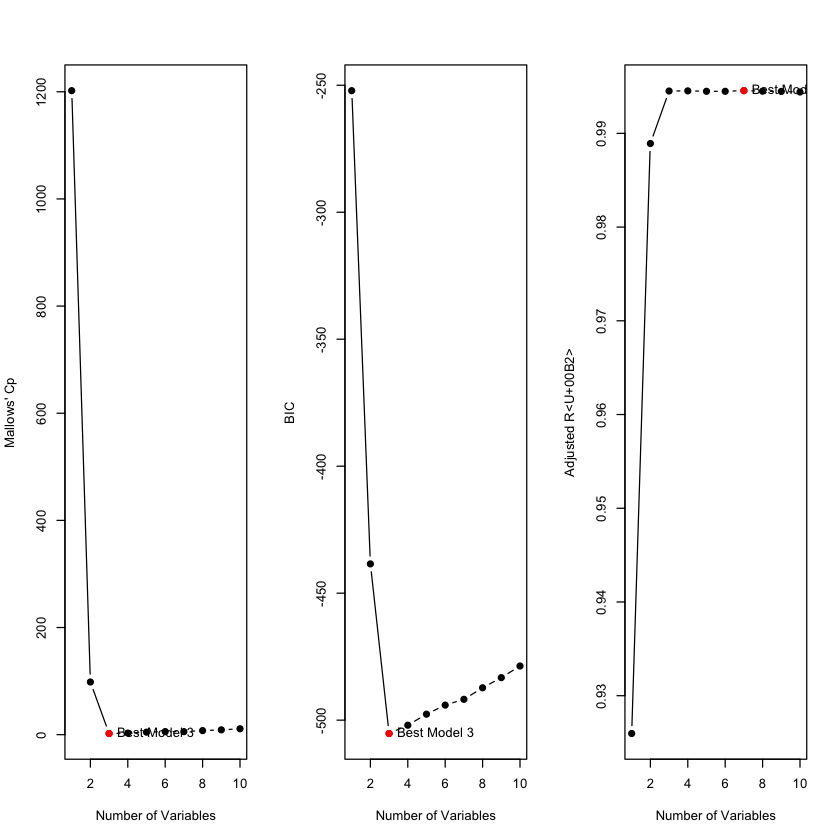

In [25]:
# create plots for Mallows' Cp, BIC and adjusted R²
par(mfrow = c(1, 3))

# plot Mallows' Cp
plot(best_summary$cp, xlab = "Number of Variables", ylab = "Mallows' Cp", type = "b", pch = 19)
points(which.min(best_summary$cp), min(best_summary$cp), col = "red", pch = 19)
text(which.min(best_summary$cp), min(best_summary$cp), labels = paste("Best Model", which.min(best_summary$cp)), pos = 4)

# plot BIC
plot(best_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "b", pch = 19)
points(which.min(best_summary$bic), min(best_summary$bic), col = "red", pch = 19)
text(which.min(best_summary$bic), min(best_summary$bic), labels = paste("Best Model", which.min(best_summary$bic)), pos = 4)

# plot adjusted R²
plot(best_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R²", type = "b", pch = 19)
points(which.max(best_summary$adjr2), max(best_summary$adjr2), col = "red", pch = 19)
text(which.max(best_summary$adjr2), max(best_summary$adjr2), labels = paste("Best Model", which.max(best_summary$adjr2)), pos = 4)

# display the number of variables selected by each criterion
cat("\nNumber of variables selected by different criterion:\n")
cat("Mallows' Cp selects", which.min(best_summary$cp), "variables\n")
cat("BIC selects", which.min(best_summary$bic), "variables\n")
cat("Adjusted R² selects", which.max(best_summary$adjr2), "variables\n")

# Determine the best model
best_model_cp <- which.min(best_summary$cp)  
best_model_bic <- which.min(best_summary$bic)
best_model_adj_r2 <- which.max(best_summary$adjr2)

# See the models selected by each criterion
cat("\nCoefficients of model selected by Mallows' Cp:\n")
print(coef(best_subset, best_model_cp))

cat("\nCoefficients of model selected by Adjusted R²:\n")
print(coef(best_subset, best_model_adj_r2))

cat("\nCoefficients of model selected by BIC:\n")
print(coef(best_subset, best_model_bic))



> *VS Code kept prompting me to assume BIC was the preferred model but Mallows' CP also chose 3 variables so I printed the coefficients of the three models and see that Mallows' CP and BIC have the same coefficients, all of which are very close to the values I chose originally. They're also closer than the coefficients in the adjusted R squared model and the R^2 model additionally incorrectly chose 7 variables. Mallows' CP and BIC penalize the model in different ways and have arrived at the same answers.*
>

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:


Number of variables selected by different criterion:
Mallows' Cp selects 3 variables
BIC selects 3 variables
Adjusted R<U+00B2> selects 4 variables

Coefficients of model selected by Mallows' Cp:
(Intercept)           X          X2          X3 
   4.970394    1.920446    2.908457    4.020436 

Coefficients of model selected by Adjusted R<U+00B2>:
(Intercept)           X          X2          X3          X6 
5.040475559 1.928367169 2.746130084 4.023397035 0.009248115 

Coefficients of model selected by BIC:
(Intercept)           X          X2          X3 
   4.970394    1.920446    2.908457    4.020436 


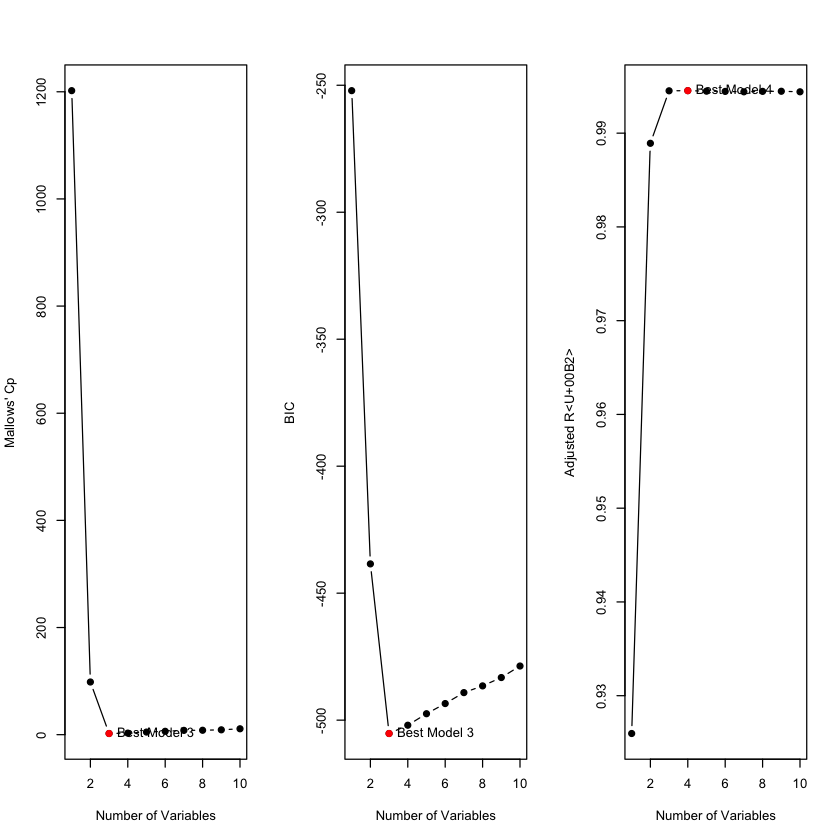

In [20]:
library(leaps)
library(tidyverse)

# perform forward stepwise selection
forward_stepwise <- regsubsets(Y ~ X + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10, data = df, nvmax = 10, method = "forward")

forward_summary <- summary(forward_stepwise)

#plot criteria for forward stepwise selection
par(mfrow = c(1, 3))

# plot Mallows' Cp
plot(forward_summary$cp, xlab = "Number of Variables", ylab = "Mallows' Cp", type = "b", pch = 19)
points(which.min(forward_summary$cp), min(forward_summary$cp), col = "red", pch = 19)
text(which.min(forward_summary$cp), min(forward_summary$cp), labels = paste("Best Model", which.min(forward_summary$cp)), pos = 4)

# plot BIC
plot(forward_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "b", pch = 19)
points(which.min(forward_summary$bic), min(forward_summary$bic), col = "red", pch = 19)
text(which.min(forward_summary$bic), min(forward_summary$bic), labels = paste("Best Model", which.min(forward_summary$bic)), pos = 4)

# plot adjusted R²
plot(forward_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R²", type = "b", pch = 19)
points(which.max(forward_summary$adjr2), max(forward_summary$adjr2), col = "red", pch = 19)
text(which.max(forward_summary$adjr2), max(forward_summary$adjr2), labels = paste("Best Model", which.max(forward_summary$adjr2)), pos = 4)

# display the number of variables selected by each criterion
cat("\nNumber of variables selected by different criterion:\n")
cat("Mallows' Cp selects", which.min(forward_summary$cp), "variables\n")
cat("BIC selects", which.min(forward_summary$bic), "variables\n")
cat("Adjusted R² selects", which.max(forward_summary$adjr2), "variables\n")

# Determine the best model
best_model_cp <- which.min(forward_summary$cp)
best_model_bic <- which.min(forward_summary$bic)
best_model_adj_r2 <- which.max(forward_summary$adjr2)

# print coefficients of the models selected by each criterion
cat("\nCoefficients of model selected by Mallows' Cp:\n")
print(coef(forward_stepwise, best_model_cp))

cat("\nCoefficients of model selected by Adjusted R²:\n")
print(coef(forward_stepwise, best_model_adj_r2))

cat("\nCoefficients of model selected by BIC:\n")
print(coef(forward_stepwise, best_model_bic))



In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:


Number of variables selected by different criterion:
Mallows' Cp selects 3 variables
BIC selects 3 variables
Adjusted R<U+00B2> selects 7 variables

Coefficients of model selected by Mallows' Cp:
(Intercept)           X          X2          X3 
   4.970394    1.920446    2.908457    4.020436 

Coefficients of model selected by Adjusted R<U+00B2>:
(Intercept)           X          X2          X3          X4          X6 
  4.7931750   1.8907484   5.2758848   4.0530514  -4.0243410   2.2138377 
         X8         X10 
 -0.4870719   0.0373538 

Coefficients of model selected by BIC:
(Intercept)           X          X2          X3 
   4.970394    1.920446    2.908457    4.020436 


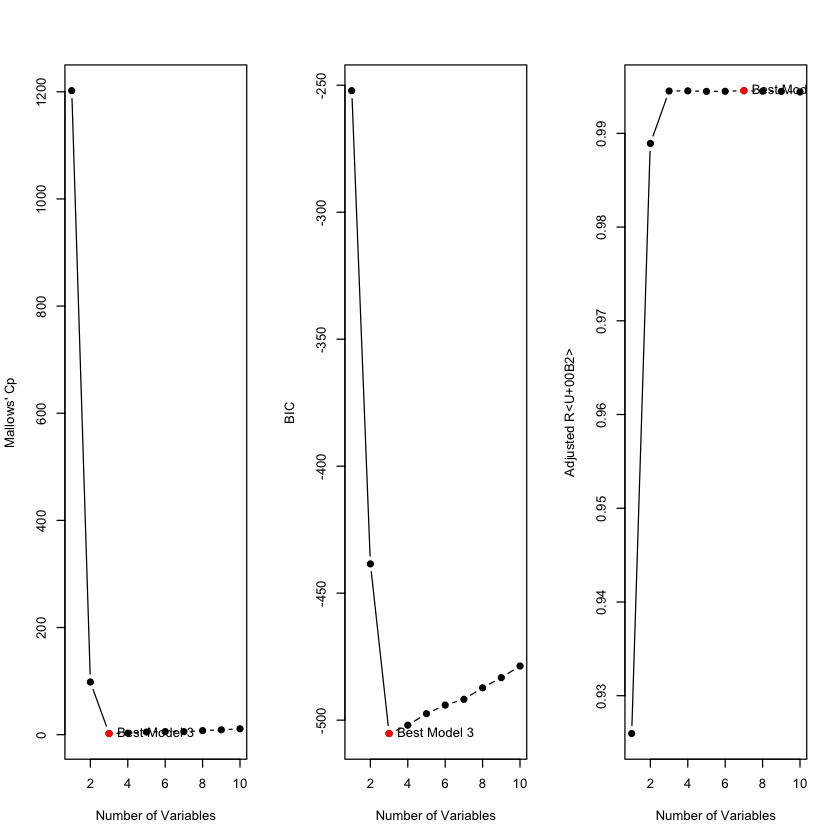

In [21]:
library(leaps)
library(tidyverse)

# perform forward stepwise selection
backward_stepwise <- regsubsets(Y ~ X + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10, data = df, nvmax = 10, method = "backward")

backward_summary <- summary(backward_stepwise)

#plot criteria for backward stepwise selection
par(mfrow = c(1, 3))

# plot Mallows' Cp
plot(backward_summary$cp, xlab = "Number of Variables", ylab = "Mallows' Cp", type = "b", pch = 19)
points(which.min(backward_summary$cp), min(backward_summary$cp), col = "red", pch = 19)
text(which.min(backward_summary$cp), min(backward_summary$cp), labels = paste("Best Model", which.min(backward_summary$cp)), pos = 4)

# plot BIC
plot(backward_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "b", pch = 19)
points(which.min(backward_summary$bic), min(backward_summary$bic), col = "red", pch = 19)
text(which.min(backward_summary$bic), min(backward_summary$bic), labels = paste("Best Model", which.min(backward_summary$bic)), pos = 4)

# plot adjusted R²
plot(backward_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R²", type = "b", pch = 19)
points(which.max(backward_summary$adjr2), max(backward_summary$adjr2), col = "red", pch = 19)
text(which.max(backward_summary$adjr2), max(backward_summary$adjr2), labels = paste("Best Model", which.max(backward_summary$adjr2)), pos = 4)

# display the number of variables selected by each criterion
cat("\nNumber of variables selected by different criterion:\n")
cat("Mallows' Cp selects", which.min(backward_summary$cp), "variables\n")
cat("BIC selects", which.min(backward_summary$bic), "variables\n")
cat("Adjusted R² selects", which.max(backward_summary$adjr2), "variables\n")

# Determine the best model
best_model_cp <- which.min(backward_summary$cp)
best_model_bic <- which.min(backward_summary$bic)
best_model_adj_r2 <- which.max(backward_summary$adjr2)

# print coefficients of the models selected by each criterion
cat("\nCoefficients of model selected by Mallows' Cp:\n")
print(coef(backward_stepwise, best_model_cp))

cat("\nCoefficients of model selected by Adjusted R²:\n")
print(coef(backward_stepwise, best_model_adj_r2))

cat("\nCoefficients of model selected by BIC:\n")
print(coef(backward_stepwise, best_model_bic))


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> *Again the Mallows' CP and BIC chose the right # of variables and also closely estimated the values I chose for the coefficients.*
>

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [28]:
# set seed for reproducibility
set.seed(123)

# parameters
n_total <- 1000
n_train <- 100
n_test <- n_total - n_train
p <- 20 # number of features

# generate feature matrix
X <- matrix(rnorm(n_total * p), nrow = n_total, ncol = p)

# generate coefficient vector beta with some zero coefficients
beta <- rnorm(p)
beta[sample(1:p, 5)] <- 0  # set some coefficients to zero

# generate error term
epsilon <- rnorm(n_total)
Y <- X %*% beta + epsilon

# create data frame
df <- data.frame(Y, X)

# split data into training and test sets
train_indices <- sample(1:n_total, n_train)
train_data <- df[train_indices, ]
test_data <- df[-train_indices, ]

# verify dimensions
cat("Training set dimensions:", dim(train_data), "\n")
cat("Test set dimensions:", dim(test_data), "\n")

# Print the true coefficients
cat("True coefficients:\n")
print(beta)

# View a few rows of the training data
head(train_data)



Training set dimensions: 100 21 
Test set dimensions: 900 21 
True coefficients:
 [1] -0.83629674 -0.22057299 -2.10351477 -1.66780754 -1.09796286 -1.66562121
 [7] -0.04950063  0.00000000 -0.40462394  0.00000000  0.00000000  1.03710539
[13] -1.13370942 -1.20530981  1.66870572  1.53615793 -0.09693335  0.13277369
[19]  0.00000000  0.00000000


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
162,3.6427967,-1.0491770,-0.3331209,0.54364862,-0.13757958,-0.8396500,-0.4616151,0.41958246,-1.22108962,-0.02607117,...,-0.23623051,1.57359256,1.0498063,0.571934538,-0.4902213,1.2414448,0.6024299,0.01737092,0.29221703,-1.1887699
655,-6.8058454,0.4806256,-0.8212585,0.37291043,-0.42412913,0.2073766,-0.3869388,-0.98414408,0.06773525,1.59134944,...,0.26429170,0.82963921,-0.2786185,-0.008243962,-1.3794864,-2.5516677,0.5759691,0.18446482,-0.26859254,1.0060996
152,-5.6981942,0.7690422,-0.9578494,1.63398966,-0.54591195,0.3157881,0.1034207,-1.81633710,0.52443819,-0.24266712,...,0.90403940,-1.27403454,-0.2404448,-1.203412021,-1.4592196,-0.7300499,0.4191031,0.49267355,0.71266048,0.3875345
843,0.2678695,-0.4583901,-0.1252000,0.27303842,0.02047766,-0.5665926,-0.1290371,0.16004341,0.92109722,1.81189244,...,-0.92171996,-0.05095623,-0.5132021,-0.657284787,0.3623896,-0.9998381,0.1502873,-0.87773602,-0.01809819,-0.7428048
18,6.1477358,-1.9666172,-1.2619005,-0.04887677,1.45374084,-0.8585493,-0.8516120,-0.31861157,1.47958554,1.31201547,...,0.35626109,0.73143302,0.2692622,0.524539167,2.1004824,0.9604040,-0.4673132,0.09501989,-0.60666044,-1.3698477
893,4.0380971,-1.1164164,1.1462600,-1.33826589,-0.54873102,0.7987937,1.3107015,0.02493433,0.06804918,0.90775199,...,-0.06594678,0.72551312,-0.1337752,-1.101035065,-0.5266126,1.1419902,-0.1836893,-0.15452455,0.69332851,0.7212548


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

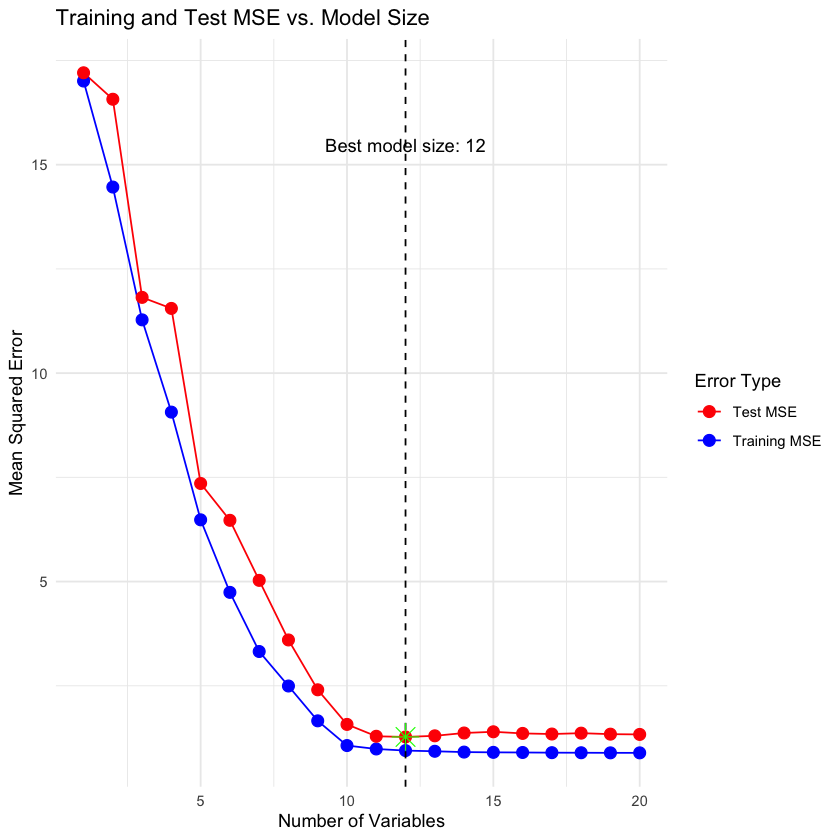

In [31]:
# Load necessary libraries
library(leaps)
library(ggplot2)
library(tidyr)  # For data reshaping

# define a function to calculate MSE
mse <- function(y_true, y_pred) {
  mean((y_true - y_pred)^2)
}

# create X matricies for training and test sets
X_train <- as.matrix(train_data[, -1])
X_test <- as.matrix(test_data[, -1])
y_train <- train_data$Y
y_test <- test_data$Y

# Perform best subset selection
best_subset <- regsubsets(x = X_train, y = y_train, nvmax = p)
best_summary <- summary(best_subset)

# initialize vectors to store MSE values
mse_train <- numeric(p)
mse_test <- numeric(p)

# for each model size, calculate MSE for training and test sets
for (i in 1:p) {
  # get the model coefficients
  coefs <- coef(best_subset, id = i)

  # get variables included in the model
  included_vars <- names(coefs)[-1]  # exclude intercept

    # create model matrix for training set
    if (length(included_vars) > 0) {
    X_train_subset <- X_train[, included_vars, drop = FALSE]
    X_test_subset <- X_test[, included_vars, drop = FALSE]
  
    # add intercept column
    X_train_intercept <- cbind(1, X_train_subset)
    X_test_intercept <- cbind(1, X_test_subset)

    # make predictions on training set
    train_pred <- X_train_subset %*% coefs[included_vars]
    test_pred <- X_test_subset %*% coefs[included_vars]
}   else {
    train_pred <- rep(coefs["(Intercept)"], nrow(X_train))
    test_pred <- rep(coef["(Intercept)"], nrow(X_test))
}

  # calculate MSE for training and test sets
  mse_train[i] <- mse(y_train, train_pred)
  mse_test[i] <- mse(y_test, test_pred)
}

# Create a data frame for plotting
plot_data <- data.frame(
  Model_Size = 1:p,
  Train_MSE = mse_train,
  Test_MSE = mse_test
)

# Reshape for ggplot
plot_data_long <- pivot_longer(
  plot_data,
  cols = c(Train_MSE, Test_MSE),
  names_to = "Error_Type",
  values_to = "MSE"
)

# Find best model size (lowest test MSE)
best_model_size <- which.min(mse_test)

# Create plot
ggplot(plot_data_long, aes(x = Model_Size, y = MSE, color = Error_Type)) +
  geom_line() +
  geom_point(size = 3) +
  scale_color_manual(values = c("Train_MSE" = "blue", "Test_MSE" = "red"),
                     labels = c("Train_MSE" = "Training MSE", "Test_MSE" = "Test MSE")) +
  geom_vline(xintercept = best_model_size, linetype = "dashed") +
  geom_point(data = plot_data_long %>% 
              filter(Error_Type == "Test_MSE" & Model_Size == best_model_size),
            aes(x = Model_Size, y = MSE),
            color = "green", size = 5, shape = 8) +
  labs(title = "Training and Test MSE vs. Model Size",
       x = "Number of Variables",
       y = "Mean Squared Error",
       color = "Error Type") +
  theme_minimal() +
  annotate("text", x = best_model_size, 
           y = max(c(mse_train, mse_test)) * 0.9,
           label = paste("Best model size:", best_model_size))


c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [36]:
# find best model
best_model_size <- which.min(mse_test)
cat("Best model size (lowest test MSE):", best_model_size, "\n")

# print the coefficients of the best model
cat("Coefficients of the best model:\n")
print(coef(best_subset, best_model_size))

# compare to the actual model used to simulate the dataset
best_model_coef <- coef(best_subset, best_model_size)
best_model_vars <- names(best_model_coef)[-1]  # exclude intercept
cat("\nVariables included in the best model:\n")
print(best_model_vars)

# show true model (non-zero coefficients)
cat("\nTrue model (non-zero coefficients):\n")
print(beta[beta != 0])  # only show non-zero coefficients

# show which variables actually had non-zero coefficients
true_non_zero_vars <- which(beta != 0)
cat("\nVariables with non-zero coefficients in the true model:\n")
print(paste0("X", true_non_zero_vars))  # show variable names

# Analyze accuracy of variable selection
true_zeros <- which(beta == 0)
true_non_zeros <- which(beta != 0)

# extract column numbers from variable names
selected_var <- as.numeric(gsub("X", "", best_model_vars))

# calculate correct and incorrect selections
correctly_included <- length(intersect(selected_var, true_non_zero_vars))
correctly_excluded <- length(setdiff(true_non_zero_vars, selected_var))
false_positives <- length(intersect(selected_var, true_zeros))
false_negatives <- length(setdiff(true_non_zero_vars, selected_var))

cat("\nAccuracy of variable selection:\n")
cat("Correctly included variables:", correctly_included, "\n")
cat("Correctly excluded variables:", correctly_excluded, "\n")
cat("False positives:", false_positives, "\n")
cat("False negatives:", false_negatives, "\n")








Best model size (lowest test MSE): 12 
Coefficients of the best model:
(Intercept)          X1          X3          X4          X5          X6 
 0.02743203 -0.87924886 -1.75763251 -1.72682294 -1.07911034 -1.68328982 
         X9         X12         X13         X14         X15         X16 
-0.31602171  0.99325716 -1.12922474 -1.28083305  1.77710751  1.68868127 
        X17 
-0.20180352 

Variables included in the best model:
 [1] "X1"  "X3"  "X4"  "X5"  "X6"  "X9"  "X12" "X13" "X14" "X15" "X16" "X17"

True model (non-zero coefficients):
 [1] -0.83629674 -0.22057299 -2.10351477 -1.66780754 -1.09796286 -1.66562121
 [7] -0.04950063 -0.40462394  1.03710539 -1.13370942 -1.20530981  1.66870572
[13]  1.53615793 -0.09693335  0.13277369

Variables with non-zero coefficients in the true model:
 [1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X9"  "X12" "X13" "X14" "X15"
[13] "X16" "X17" "X18"

Accuracy of variable selection:
Correctly included variables: 12 
Correctly excluded variables: 3 
False 

> *Question 3b shows 12 is the best model size for MSE and this further analysis shows the coefficients of both the true model and the MSE model, which are fairly close to each other.*
>

**DUE:** 5pm EST, April 8, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *My coding tutor, claude.ai*